In [11]:
from sklearn import svm, datasets
import pandas as pd

In [14]:
iris = datasets.load_iris()
iris.data[:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [15]:
# displaying the contents of iris
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [16]:
# displaying the data of 5 rows
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
# displaying name for each four columns
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
# displaying target values and target names
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [19]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
# concatenate target value and into the dataframe
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
df['target_names'] = df['target'].apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
print(pd.unique(iris.target))
print(iris.target_names)

[0 1 2]
['setosa' 'versicolor' 'virginica']


In [23]:
# splitting the dataset for each target values
# setosa.
df1 = df[df.target==0]
# versicolor 
df2 = df[df.target==1]
# virginica
df3 = df[df.target==2]

In [27]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [24]:
# import plotting library 'matplotlib'
import matplotlib.pyplot as plt

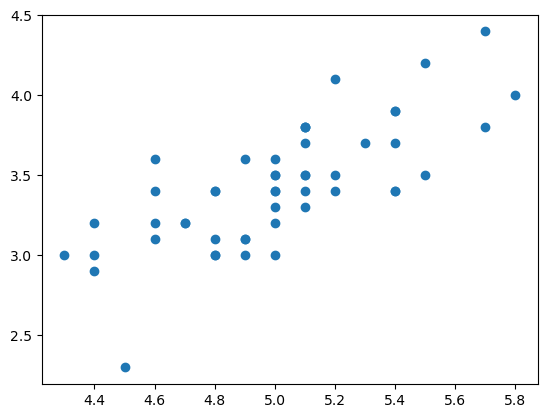

In [29]:
# plot scatter plot for setosa
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'])
plt.show()

In [30]:
X = df[["sepal length (cm)","sepal width (cm)", "petal length (cm)", "petal width (cm)"]].values
y = df.target.values

In [35]:
X.shape

(150, 4)

In [36]:
y.shape

(150,)

In [37]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [38]:
# split the X and y dataset into traininga and testing dataset
# displaying total train and test set for each X and y dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

120 30
120 30


## Train Test split 

In [39]:
# importing machine learning model library
from sklearn import svm

In [40]:
# train the model and predict using the test dataset ie y
model = svm.SVC(kernel='rbf', C=30, gamma='auto')
model.fit(X_train, y_train)
model.predict(X_test)

array([0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       2, 1, 0, 2, 0, 1, 0, 1])

In [41]:
# lets compare with the actual result
y_test

array([0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       2, 1, 0, 2, 0, 1, 0, 1])

## Cross Validation Score

In [42]:
# trying another type of model_selection called kfold or cross_validation_score
# cross validation score will split a dataset into separate dataset and train the model cv=N times returning N score result
from sklearn.model_selection import cross_val_score

In [43]:
cross_val_score(svm.SVC(kernel='linear', C=10, gamma='auto'), X, y, cv=5 )

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [44]:
cross_val_score(svm.SVC(kernel='rbf', C=10, gamma='auto'), X, y, cv=5 )

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [45]:
cross_val_score(svm.SVC(kernel='rbf', C=20, gamma='auto'), X, y, cv=5 )

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [46]:
cross_val_score(svm.SVC(kernel='rbf', C=20, gamma='auto'), X, y, cv=3 )

array([0.98, 0.94, 0.98])

In [47]:
# lets calculate the above values and take average for each 
import numpy as np

In [48]:
kernels = ['linear', 'rbf']
Cs = [1, 5, 10]
avg_scores = {}
for x in kernels:
    for cval in Cs:
        cvs = cross_val_score(svm.SVC(kernel=x, C=cval, gamma='auto'),X, y, cv=5)
        avg_scores[x+"_"+str(cval)] = np.mean(cvs)
avg_scores

{'linear_1': 0.9800000000000001,
 'linear_5': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'rbf_1': 0.9800000000000001,
 'rbf_5': 0.9800000000000001,
 'rbf_10': 0.9800000000000001}

## GridSearchView
grid search view allows us to do the above long nested for loop cross validation into a few lines of code

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 20]
}, cv=5, return_train_score=False)

clf.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['linear', 'rbf']})

In [51]:
clf.cv_results_

{'mean_fit_time': array([0.00225406, 0.        , 0.00012226, 0.0007997 , 0.00102196,
        0.00075803]),
 'std_fit_time': array([4.50811386e-03, 0.00000000e+00, 2.44522095e-04, 3.99852066e-04,
        4.37030035e-05, 6.82739859e-04]),
 'mean_score_time': array([7.50064850e-05, 0.00000000e+00, 3.32894325e-03, 4.00066376e-04,
        4.00066376e-04, 8.17537308e-04]),
 'std_score_time': array([0.00015001, 0.        , 0.00616884, 0.00048998, 0.00048998,
        0.00041024]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 20, 'ker

In [52]:
# the above GridSearchCV result is in the form of dictionary so we can clput it inside pandas DataFrame and make it easire to read
gscv_result = pd.DataFrame(clf.cv_results_)

gscv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002254,0.004508,0.000075,0.000150,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000000,0.000000,0.000000,0.000000,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000122,0.000245,0.003329,0.006169,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
3,0.000800,0.000400,0.000400,0.000490,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.001022,0.000044,0.000400,0.000490,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6
5,0.000758,0.000683,0.000818,0.000410,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5


In [53]:
gscv_result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [54]:
gscv_result[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.980000
1,1,rbf,0.980000
2,10,linear,0.973333
3,10,rbf,0.980000
4,20,linear,0.966667
5,20,rbf,0.966667


In [55]:
# displaying properties of GridSearchCV model
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 '

In [56]:
clf.best_score_

0.9800000000000001

In [57]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [58]:
clf.best_estimator_

SVC(C=1, gamma='auto', kernel='linear')

In [59]:
clf.best_index_

0

### SOME USEFUL NOTES

In [60]:
# way 1: display specific column value
df.iloc[:,0:2]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [61]:
# way 2: display specific column value
df.loc[:,["sepal length (cm)","sepal width (cm)"]]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4
